#  Создание и настройка нейронной сети при помощи пакета `torch`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html
* https://pytorch.org/docs/stable/optim.html
* https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
* https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
* https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
* https://saturncloud.io/blog/can-i-use-tensorboard-with-google-colab/

## Задачи для совместного разбора

1\. Используя собственную реализацию нейрона и пакетного градиентного спуска, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE.

In [ ]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Генерация данных
X, y, coef = make_regression(n_samples=1000, n_features=4, n_informative=4,
                            coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)

y = th.FloatTensor(y).view(-1, 1)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = th.FloatTensor(scaler_X.fit_transform(X_train))
X_test = th.FloatTensor(scaler_X.transform(X_test))
y_train = th.FloatTensor(scaler_y.fit_transform(y_train))
y_test = th.FloatTensor(scaler_y.transform(y_test))



C:\Users\Kq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


[-3.40724873e+01 -9.11538563e+01 -1.19682466e+01 -6.32903398e+00
  3.88063744e+01  2.08340296e+02  1.85181476e+02  3.72690858e+01
 -6.73939716e+01  3.35585947e+00 -1.75166706e+02 -6.94516783e+01
 -1.51478737e+02  9.83158023e+01  1.56415529e+02  7.83488532e+01
  7.33594783e+01 -9.54730003e+01 -6.39618091e+01  4.71427385e+01
  7.40114178e+01 -1.82294856e+01 -5.23751671e+01  1.07460882e+02
 -7.02910568e+01 -1.91214062e+02 -5.56422335e+01 -1.04972729e+02
  1.07313532e+01 -5.61012560e+01 -2.93446612e+01  8.43762451e+01
  7.01100651e+01  8.39336146e+01  1.72930912e+02 -7.46688876e+01
  1.27006822e+02 -2.04949692e+01  1.35425293e+01 -1.65687549e+02
  8.99855518e+01  1.68086557e+02 -9.54871192e+01 -3.57414425e+01
 -2.90379028e+01  7.32210896e+01 -1.83737937e+02  5.02292796e+01
 -1.15078951e+01  5.50365199e+01 -1.20276024e+02 -1.88495010e+02
  6.50062533e+01  4.08419186e+01 -3.11873564e+01 -1.89234697e+02
  1.57580701e+02 -1.80460074e+01 -2.60042061e+01 -1.16329924e+02
  7.28842132e+01 -1.15324

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        self.weights = th.randn(n_inputs, 1, requires_grad=True)
        self.bias = th.randn(1, requires_grad=True)

    def forward(self, x):

        return x @ self.weights + self.bias

    def parameters(self):
        return [self.weights, self.bias]

    def zero_grad(self):
        for param in self.parameters():
            if param.grad is not None:
                param.grad.zero_()

In [ ]:
def mse_loss(y_true, y_pred):
    """Среднеквадратичная ошибка"""
    return ((y_true - y_pred) ** 2).mean()

Итерация 0, Train Loss: 2.6875, Test Loss: 2.8735
Итерация 1, Train Loss: 0.9347, Test Loss: 1.0008
Итерация 2, Train Loss: 0.3257, Test Loss: 0.3492
Итерация 3, Train Loss: 0.1137, Test Loss: 0.1221
Итерация 4, Train Loss: 0.0398, Test Loss: 0.0428
Итерация 5, Train Loss: 0.0140, Test Loss: 0.0150
Итерация 6, Train Loss: 0.0049, Test Loss: 0.0053
Итерация 7, Train Loss: 0.0017, Test Loss: 0.0019
Итерация 8, Train Loss: 0.0006, Test Loss: 0.0007
Итерация 9, Train Loss: 0.0002, Test Loss: 0.0002
Итерация 10, Train Loss: 0.0001, Test Loss: 0.0001
Итерация 11, Train Loss: 0.0000, Test Loss: 0.0000
Итерация 12, Train Loss: 0.0000, Test Loss: 0.0000
Итерация 13, Train Loss: 0.0000, Test Loss: 0.0000
Итерация 14, Train Loss: 0.0000, Test Loss: 0.0000
Итерация 15, Train Loss: 0.0000, Test Loss: 0.0000
Итерация 16, Train Loss: 0.0000, Test Loss: 0.0000
Итерация 17, Train Loss: 0.0000, Test Loss: 0.0000
Итерация 18, Train Loss: 0.0000, Test Loss: 0.0000
Итерация 19, Train Loss: 0.0000, Test Los

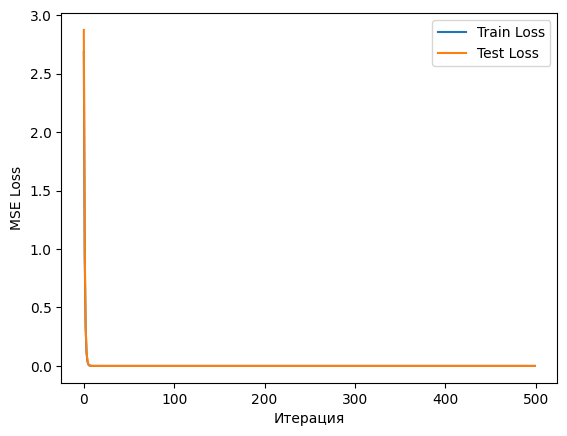

In [ ]:

neuron = Neuron(n_inputs=X_train.shape[1])


learning_rate = 0.01
n_epochs = 500
batch_size = 32
n_samples = X_train.shape[0]


train_losses = []
test_losses = []

for epoch in range(n_epochs):
    permutation = th.randperm(n_samples)

    for i in range(0, n_samples, batch_size):
        indices = permutation[i:i+batch_size]
        X_batch = X_train[indices]
        y_batch = y_train[indices]

        neuron.zero_grad()

        y_pred = neuron.forward(X_batch)

        loss = mse_loss(y_batch, y_pred)

        loss.backward()

        with th.no_grad():
            for param in neuron.parameters():
                param -= learning_rate * param.grad

    with th.no_grad():
        train_pred = neuron.forward(X_train)
        train_loss = mse_loss(y_train, train_pred)
        train_losses.append(train_loss.item())

        test_pred = neuron.forward(X_test)
        test_loss = mse_loss(y_test, test_pred)
        test_losses.append(test_loss.item())

        print(f'Итерация {epoch}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# График обучения
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Итерация')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

2\. Используя реализацию нейрона из `torch.nn`, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE. Для настройки весов реализуйте пакетный градиентный спуск с использованием `torch.optim`.

Epoch   0 | Train Loss: 0.4668 | Test Loss: 0.4067
Epoch  50 | Train Loss: 0.0000 | Test Loss: 0.0000
Epoch 100 | Train Loss: 0.0000 | Test Loss: 0.0000
Epoch 150 | Train Loss: 0.0000 | Test Loss: 0.0000
Epoch 200 | Train Loss: 0.0000 | Test Loss: 0.0000
Epoch 250 | Train Loss: 0.0000 | Test Loss: 0.0000
Epoch 300 | Train Loss: 0.0000 | Test Loss: 0.0000
Epoch 350 | Train Loss: 0.0000 | Test Loss: 0.0000
Epoch 400 | Train Loss: 0.0000 | Test Loss: 0.0000
Epoch 450 | Train Loss: 0.0000 | Test Loss: 0.0000


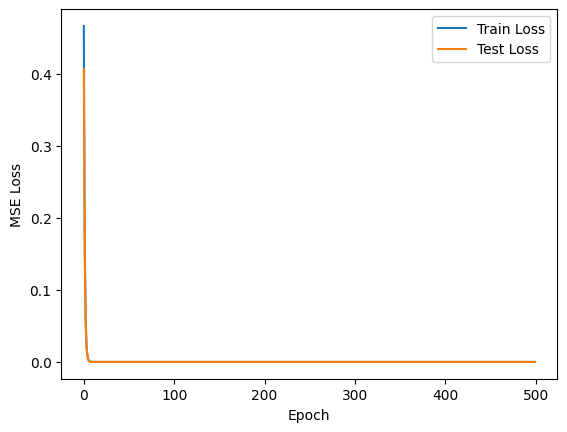

Final Test MSE: 0.0106

Model weights:
0.weight: [0.43284243 0.06993447 0.81308    0.38100538]
0.bias: [1.4734553e-07]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X, y = make_regression(n_samples=1000, n_features=4, noise=0.1, random_state=42)
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).view(-1, 1)   #[n_samples, 1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = torch.FloatTensor(scaler_X.fit_transform(X_train))
X_test = torch.FloatTensor(scaler_X.transform(X_test))
y_train = torch.FloatTensor(scaler_y.fit_transform(y_train))
y_test = torch.FloatTensor(scaler_y.transform(y_test))


class MSE(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true)**2)


model = nn.Sequential(
    nn.Linear(in_features=4, out_features=1)
)


loss_function = MSE()  # Функция потерь
optimizer = optim.SGD(model.parameters(), lr=0.01)
batch_size = 32
n_epochs = 500


train_losses = []
test_losses = []

for epoch in range(n_epochs):

    permutation = torch.randperm(X_train.size(0))

    # Пакетное обучение
    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        X_batch = X_train[indices]
        y_batch = y_train[indices]


        optimizer.zero_grad()

        outputs = model(X_batch)


        loss = loss_function(outputs, y_batch)


        loss.backward()


        optimizer.step()


    with torch.no_grad():
        train_pred = model(X_train)
        train_loss = loss_function(train_pred, y_train)
        train_losses.append(train_loss.item())

        test_pred = model(X_test)
        test_loss = loss_function(test_pred, y_test)
        test_losses.append(test_loss.item())

    if epoch % 50 == 0:
        print(f'Epoch {epoch:3d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}')


import matplotlib.pyplot as plt
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


with torch.no_grad():

    y_pred = model(X_test)
    y_pred_orig = scaler_y.inverse_transform(y_pred.numpy())
    y_test_orig = scaler_y.inverse_transform(y_test.numpy())

    final_mse = ((y_test_orig - y_pred_orig)**2).mean()
    print(f'Final Test MSE: {final_mse:.4f}')

print("\nModel weights:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data.numpy().flatten()}")

3\. Добавьте визуализацию изменения значения функции потерь во время обучения, используя `tensorboard`.




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter  # Импорт TensorBoard
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


writer = SummaryWriter('runs/regression_experiment_1')


X, y = make_regression(n_samples=1000, n_features=4, noise=0.1, random_state=42)
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = torch.FloatTensor(scaler_X.fit_transform(X_train))
X_test = torch.FloatTensor(scaler_X.transform(X_test))
y_train = torch.FloatTensor(scaler_y.fit_transform(y_train))
y_test = torch.FloatTensor(scaler_y.transform(y_test))


model = nn.Sequential(nn.Linear(4, 1))
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


for epoch in range(500):

    permutation = torch.randperm(X_train.size(0))
    for i in range(0, X_train.size(0), 32):
        indices = permutation[i:i+32]
        X_batch, y_batch = X_train[indices], y_train[indices]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()


    with torch.no_grad():

        train_outputs = model(X_train)
        train_loss = criterion(train_outputs, y_train)
        writer.add_scalar('Loss/train', train_loss, epoch)


        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        writer.add_scalar('Loss/test', test_loss, epoch)


        for name, param in model.named_parameters():
            writer.add_histogram(f'weights/{name}', param, epoch)

    if epoch % 50 == 0:
        print(f'Epoch {epoch}: Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


writer.close()

# tensorboard --logdir=runs/

Epoch 0: Train Loss: 0.3112, Test Loss: 0.3206
Epoch 50: Train Loss: 0.0000, Test Loss: 0.0000
Epoch 100: Train Loss: 0.0000, Test Loss: 0.0000
Epoch 150: Train Loss: 0.0000, Test Loss: 0.0000
Epoch 200: Train Loss: 0.0000, Test Loss: 0.0000
Epoch 250: Train Loss: 0.0000, Test Loss: 0.0000
Epoch 300: Train Loss: 0.0000, Test Loss: 0.0000
Epoch 350: Train Loss: 0.0000, Test Loss: 0.0000
Epoch 400: Train Loss: 0.0000, Test Loss: 0.0000
Epoch 450: Train Loss: 0.0000, Test Loss: 0.0000


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя собственную реализацию полносвязного слоя и мини-пакетного градиентного спуска, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном



Epoch 0, Loss: 0.6411
Epoch 100, Loss: 0.0797
Epoch 200, Loss: 0.2305
Epoch 300, Loss: 0.1311
Epoch 400, Loss: 0.1226
Epoch 500, Loss: 0.1443
Epoch 600, Loss: 0.1591
Epoch 700, Loss: 0.1162
Epoch 800, Loss: 0.1318
Epoch 900, Loss: 0.1123


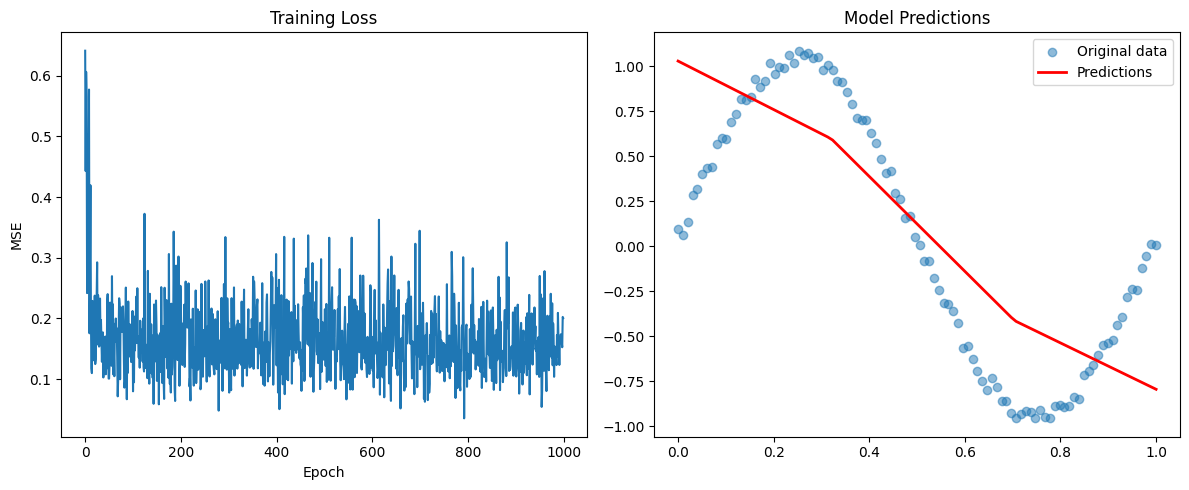

In [ ]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())


class LinearLayer(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        self.weights = torch.nn.Parameter(
            torch.randn(input_size, output_size) * 0.1,
            requires_grad=True
        )
        self.bias = torch.nn.Parameter(
            torch.zeros(output_size),
            requires_grad=True
        )

    def forward(self, x):
        return x @ self.weights + self.bias


class ReLU(torch.nn.Module):
    def forward(self, x):
        return torch.maximum(x, torch.tensor(0.0))


class MSE(torch.nn.Module):
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true)**2)


class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = LinearLayer(1, 10)
        self.activation = ReLU()
        self.fc2 = LinearLayer(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x


model = Net()
criterion = MSE()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

losses = []
n_epochs = 1000
batch_size = 10

for epoch in range(n_epochs):

    permutation = torch.randperm(X.size(0))

    for i in range(0, X.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        X_batch, y_batch = X[indices], y[indices]

        optimizer.zero_grad()


        outputs = model(X_batch)

        loss = criterion(outputs, y_batch)


        loss.backward()

        optimizer.step()


    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')
    losses.append(loss.item())


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')

# График предсказаний
plt.subplot(1, 2, 2)
plt.scatter(X.numpy(), y.numpy(), label='Original data', alpha=0.5)
with torch.no_grad():
    plt.plot(X.numpy(), model(X).numpy(), 'r-', label='Predictions', linewidth=2)
plt.title('Model Predictions')
plt.legend()

plt.tight_layout()
plt.show()

<p class="task" id="2"></p>

2\. Используя реализацию полносвязного слоя из `torch.nn` решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Для создания модели опишите класс `Net`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

Epoch 0, Loss: 0.2512
Epoch 100, Loss: 0.0959
Epoch 200, Loss: 0.0532
Epoch 300, Loss: 0.0458
Epoch 400, Loss: 0.0094
Epoch 500, Loss: 0.0117
Epoch 600, Loss: 0.0123
Epoch 700, Loss: 0.0043
Epoch 800, Loss: 0.0029
Epoch 900, Loss: 0.0041


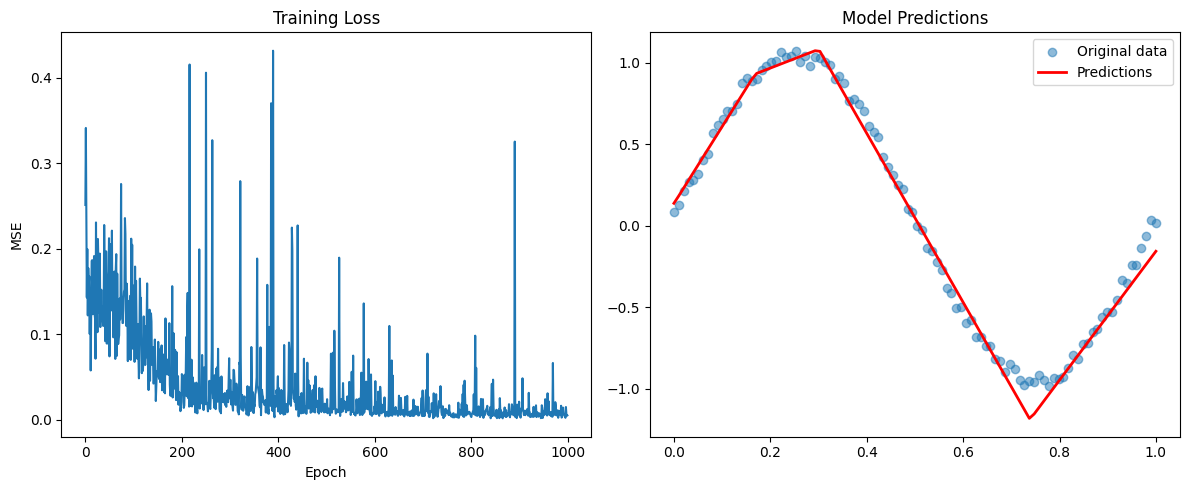

In [ ]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


model = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


losses = []
n_epochs = 1000
batch_size = 10

for epoch in range(n_epochs):

    permutation = torch.randperm(X.size(0))

    for i in range(0, X.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        X_batch, y_batch = X[indices], y[indices]


        optimizer.zero_grad()


        outputs = model(X_batch)

        loss = criterion(outputs, y_batch)

        loss.backward()

        optimizer.step()


    losses.append(loss.item())


    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.scatter(X.numpy(), y.numpy(), label='Original data', alpha=0.5)
with torch.no_grad():
    plt.plot(X.numpy(), model(X).numpy(), 'r-', label='Predictions', linewidth=2)
plt.title('Model Predictions')
plt.legend()

plt.tight_layout()
plt.show()

<p class="task" id="3"></p>

3\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Для создания модели создайте объект класса `nn.Sequential`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

Epoch    0, Loss: 0.485322
Epoch  100, Loss: 0.078043
Epoch  200, Loss: 0.051092
Epoch  300, Loss: 0.028067
Epoch  400, Loss: 0.009473
Epoch  500, Loss: 0.029472
Epoch  600, Loss: 0.027660
Epoch  700, Loss: 0.010856
Epoch  800, Loss: 0.017427
Epoch  900, Loss: 0.014263


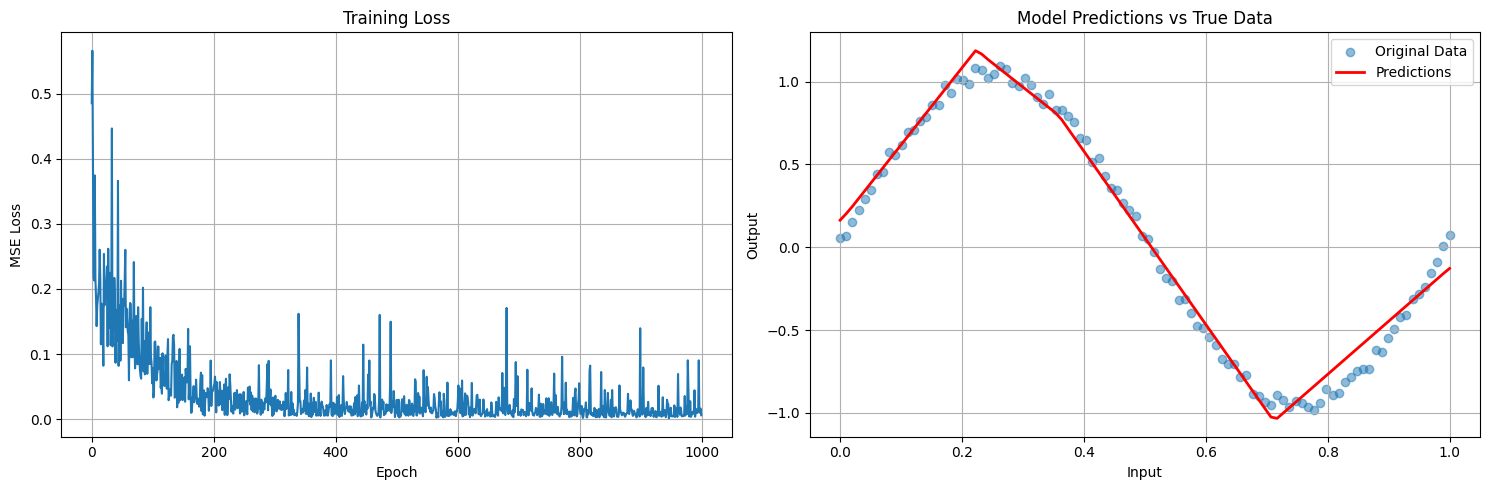

In [ ]:


import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())


model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)


criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)  # SGD оптимизатор


loss_history = []
batch_size = 10
n_epochs = 1000

for epoch in range(n_epochs):

    permutation = torch.randperm(X.size(0))


    for i in range(0, X.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        X_batch, y_batch = X[indices], y[indices]


        optimizer.zero_grad()


        outputs = model(X_batch)


        loss = criterion(outputs, y_batch)


        loss.backward()


        optimizer.step()


    loss_history.append(loss.item())


    if epoch % 100 == 0:
        print(f'Epoch {epoch:4d}, Loss: {loss.item():.6f}')

plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(X.numpy(), y.numpy(), label='Original Data', alpha=0.5)
with torch.no_grad():
    plt.plot(X.numpy(), model(X).numpy(), 'r-', label='Predictions', linewidth=2)
plt.title('Model Predictions vs True Data')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<p class="task" id="4"></p>

4\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу классификации. В качестве функции потерь используйте реализацию `CrossEntropyLoss` из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`.

Создайте и настройте две модели.

Модель 1:
1. Полносвязный слой с 10 нейронами;
3. Полносвязный слой с 2 нейронами.

Модель 2:
1. Полносвязный слой с 10 нейронами;
2. Функция активации ReLU;
3. Полносвязный слой с 2 нейронами.

Для каждой модели выведите отчет по классификации и визуализацию результатов, где точки раскрашены в цвет наиболее вероятного класса.

- [ ] Проверено на семинаре

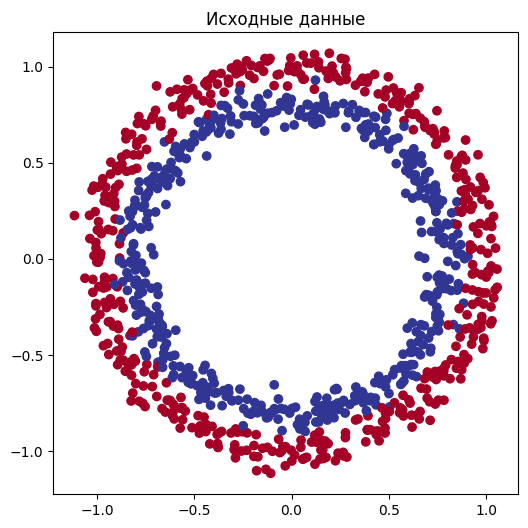

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import classification_report


X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Исходные данные")
plt.show()


class Model1(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 2)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

class Model2(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 10)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(10, 2)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x


def train_model(model, X, y, epochs=1000, lr=0.1, batch_size=32):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):

        permutation = torch.randperm(X.size(0))
        for i in range(0, X.size(0), batch_size):
            indices = permutation[i:i+batch_size]
            X_batch, y_batch = X[indices], y[indices]

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        losses.append(loss.item())

    return model, losses


model1 = Model1()
model2 = Model2()

model1, losses1 = train_model(model1, X, y)
model2, losses2 = train_model(model2, X, y)


def plot_decision_boundary(model, X, y, losses):

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))


    with torch.no_grad():
        Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = torch.argmax(Z, dim=1).numpy()

    Z = Z.reshape(xx.shape)


    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title(f"Граница решения ({model.__class__.__name__})")

    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.title("Кривая обучения")
    plt.xlabel("Эпоха")
    plt.ylabel("Loss")

    plt.show()


    with torch.no_grad():
        predictions = model(X)
        _, predicted = torch.max(predictions, 1)
        print(classification_report(y, predicted))




=== Модель 1 (без ReLU) ===


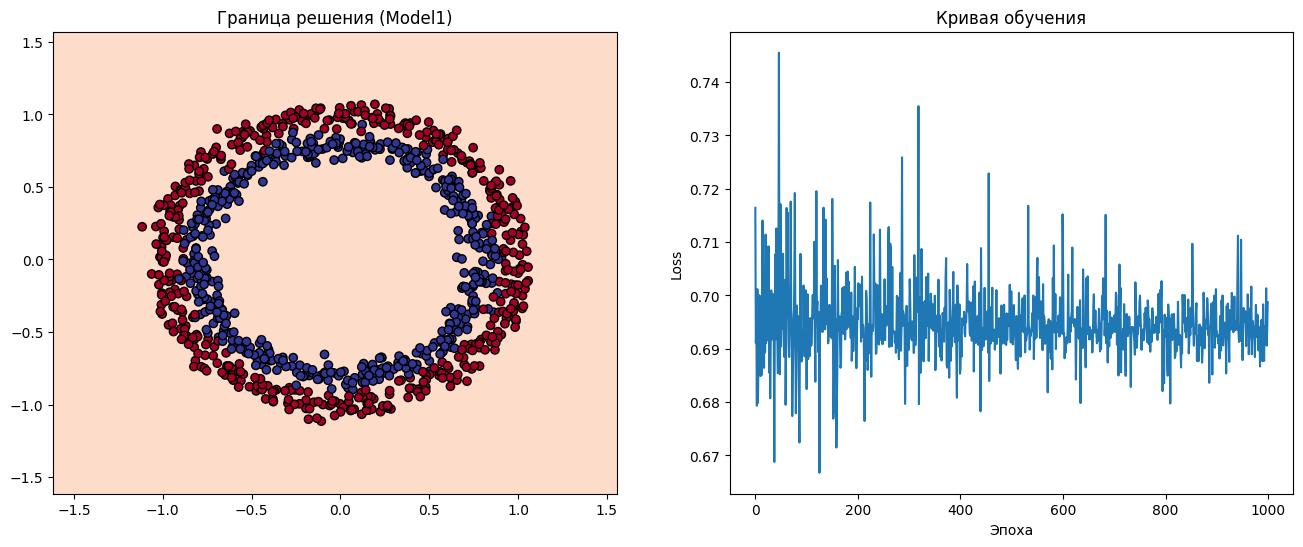

C:\Users\Kq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:150

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.50      1.00      0.67       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000


=== Модель 2 (с ReLU) ===


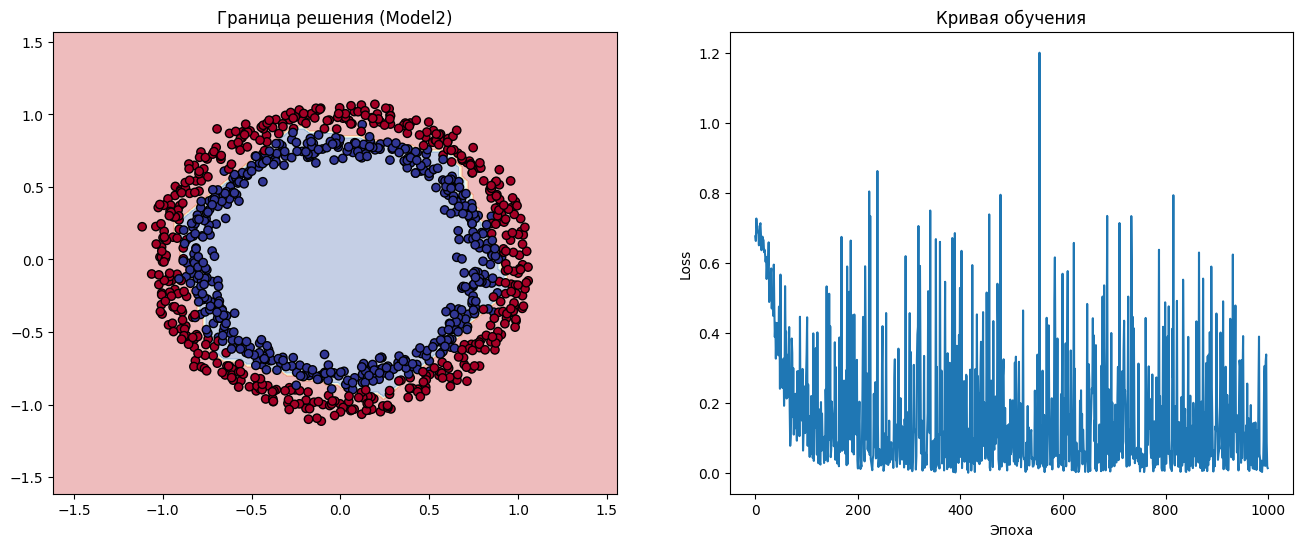

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       500
           1       0.96      0.92      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:

print("=== Модель 1 (без ReLU) ===")
plot_decision_boundary(model1, X, y, losses1)


print("\n=== Модель 2 (с ReLU) ===")
plot_decision_boundary(model2, X, y, losses2)

<p class="task" id="5"></p>

5\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Перенесите вычисления на GPU и сравните время обучения с и без использования GPU. Решение должно корректно работать в случае отсутствия GPU без дополнительных изменений в коде.

- [ ] Проверено на семинаре

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
import time


X, y, coef = make_regression(
    n_samples=10000,
    n_features=10,
    n_informative=6,
    coef=True,
    bias=0.5,
    random_state=42
)
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).reshape(-1, 1)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используемое устройство: {device}")

class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)


def train_model(device):
    model = RegressionModel().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)


    X_device = X.to(device)
    y_device = y.to(device)

    batch_size = 128
    n_epochs = 100

    start_time = time.time()

    for epoch in range(n_epochs):

        permutation = torch.randperm(X.size(0))
        for i in range(0, X.size(0), batch_size):
            indices = permutation[i:i+batch_size]
            X_batch, y_batch = X_device[indices], y_device[indices]

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        if (epoch+1) % 20 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

    training_time = time.time() - start_time
    print(f'Обучение завершено за {training_time:.2f} секунд')
    return training_time


print("\n=== Обучение на CPU ===")
cpu_time = train_model(torch.device('cpu'))

if torch.cuda.is_available():
    print("\n=== Обучение на GPU ===")
    gpu_time = train_model(torch.device('cuda'))
    print(f"\nУскорение на GPU: {cpu_time/gpu_time:.1f}x")
else:
    print("\nGPU не доступен, пропускаем тестирование на GPU")

Используемое устройство: cpu

=== Обучение на CPU ===
Epoch 20, Loss: 0.2521
Epoch 40, Loss: 0.1032
Epoch 60, Loss: 0.0370
Epoch 80, Loss: 3.9885
Epoch 100, Loss: 1.9663
Обучение завершено за 16.67 секунд

GPU не доступен, пропускаем тестирование на GPU


<p class="task" id="6"></p>

6\. Используя `torch`, решите задачу классификации. Разделите данные на обучающую и валидационную выборку.  Для настройки весов реализуйте мини-пакетный градиентный спуск на основе данных обучающих выборки.

Используйте `tensorboard` для отслеживания процесса обучения модели. Для каждой эпохи оцените и сохраните среднее значение функции потерь по батчам (для обучающей выборки) и значение функции потерь для валидационной выборки. Визуализируйте граф вычислений модели. Добавьте визуализацию матрицы несоответствий (данную визуализацию можно сохранять не каждую эпоху, а с некоторой частотой) на валидационной выборке. Продемонстрируйте скриншоты интерфейса tensorboard с визуализациями.

- [ ] Проверено на семинаре

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image


X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = torch.FloatTensor(X)
y = torch.LongTensor(y)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

model = Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


writer = SummaryWriter('runs/circle_classification_experiment')


dummy_input = torch.randn(1, 2)
writer.add_graph(model, dummy_input)


batch_size = 32
n_epochs = 200

def plot_confusion_matrix(cm):

    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap='Blues')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')


    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, cm[i, j],
                          ha="center", va="center", color="black")

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    return Image.open(buf)

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0


    permutation = torch.randperm(X_train.size(0))
    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        X_batch, y_batch = X_train[indices], y_train[indices]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()


    avg_train_loss = train_loss / (X_train.size(0) / batch_size)
    writer.add_scalar('Loss/train', avg_train_loss, epoch)


    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        writer.add_scalar('Loss/val', val_loss, epoch)


        if epoch % 20 == 0:
            _, predicted = torch.max(val_outputs, 1)
            cm = confusion_matrix(y_val, predicted)
            cm_image = plot_confusion_matrix(cm)
            writer.add_image('Confusion Matrix', np.array(cm_image), epoch, dataformats='HWC')

    if (epoch+1) % 20 == 0:
        print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}')

writer.close()
print("Обучение завершено. Запустите TensorBoard для просмотра результатов.")

Epoch 20, Train Loss: 0.0695, Val Loss: 0.2129
Epoch 40, Train Loss: 0.0633, Val Loss: 0.1748
Epoch 60, Train Loss: 0.0606, Val Loss: 0.1677
Epoch 80, Train Loss: 0.0511, Val Loss: 0.1507
Epoch 100, Train Loss: 0.0564, Val Loss: 0.1360
Epoch 120, Train Loss: 0.0426, Val Loss: 0.1668
Epoch 140, Train Loss: 0.0582, Val Loss: 0.1510
Epoch 160, Train Loss: 0.0563, Val Loss: 0.2596
Epoch 180, Train Loss: 0.0544, Val Loss: 0.3360
Epoch 200, Train Loss: 0.0629, Val Loss: 0.2226
Обучение завершено. Запустите TensorBoard для просмотра результатов.


## Обратная связь
- [ ] Хочу получить обратную связь по решению